<a href="https://colab.research.google.com/github/am2644/Rice-Race-Classification/blob/main/Rice_Race_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from PIL import Image
from tensorflow import keras

In [ ]:
#preparing dataset for classification using keras preprocessing
ds_train = keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/Rice_Image_Dataset/',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Karacadag','Basmati','Jasmine','Arborio','Ipsala'],
    color_mode = 'rgb',
    batch_size = 100,
    image_size = (224,224),
    shuffle = True,
    seed = 1234,
    validation_split = 0.1,
    subset = 'training'
)

ds_val = keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/Rice_Image_Dataset/',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Karacadag','Basmati','Jasmine','Arborio','Ipsala'],
    color_mode = 'rgb',
    batch_size = 100,
    image_size = (224,224),
    shuffle = True,
    seed = 1234,
    validation_split = 0.1,
    subset = 'validation'
)

Found 75000 files belonging to 5 classes.
Using 67500 files for training.
Found 75000 files belonging to 5 classes.
Using 7500 files for validation.


In [ ]:
s = ds_train.take(1)
s = s.as_numpy_iterator()
d,f = next(s)
f[:10]

array([2, 0, 2, 4, 3, 0, 4, 2, 3, 2], dtype=int32)

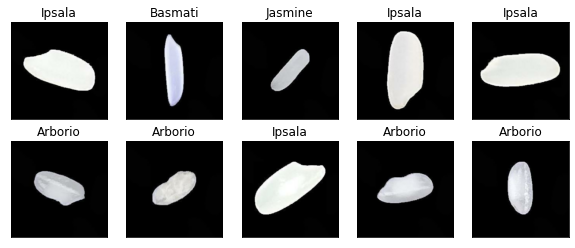

In [ ]:
fig = plt.figure(figsize=(10,4))
s = ds_train.take(1)
s = s.as_numpy_iterator()
rice_race = ['Karacadag','Basmati','Jasmine','Arborio','Ipsala']
img, label = next(s)
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(rice_race[label[i]])
    plt.imshow(img[i].astype(np.uint8))
plt.show;

In [ ]:
#define a scaler function
def scale(img,label):
    img = img/255
    return img, label

In [ ]:
#scaling train dataset and validation dataset
ds_train = ds_train.map(scale)
ds_val = ds_val.map(scale)

In [ ]:
#define plot history function for ploting loss and accuracy for every epochs
def plot_history(history):
    
    fig, axs = plt.subplots(2,figsize=(12,8))
    
    axs[0].plot(history.history['accuracy'],label='Train accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='upper left')
    axs[0].set_title('Accuracy')
    
    axs[1].plot(history.history['loss'],label='Train loss')
    axs[1].plot(history.history['val_loss'], label='Validation loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].legend(loc='lower left')
    axs[1].set_title('Loss')
    
    plt.show()

In [ ]:
import tensorflow_hub as hub

In [ ]:
#I going to use mobilenet model from tensorflow hub for traning
hub_layer = hub.KerasLayer(
    'https://tfhub.dev/google/edgetpu/vision/mobilenet-edgetpu-v2-feature-vector/l/2',
    trainable=False)

num_classes = 5
inputs = tf.keras.Input(shape=(224, 224, 3))
x = hub_layer(inputs)
x = tf.keras.layers.Conv2D(num_classes, 1, name='logits')(x)
x = tf.keras.layers.Activation('softmax', name='probs')(x)
outputs = tf.squeeze(x, axis=[1, 2])

model1 = tf.keras.Model(inputs, outputs)

In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(ds_train,validation_data=ds_val,epochs=5)

Epoch 1/5
675/675 [==============================] - 232s 316ms/step - loss: 0.1201 - accuracy: 0.9738 - val_loss: 0.0397 - val_accuracy: 0.9899
Epoch 2/5
675/675 [==============================] - 212s 313ms/step - loss: 0.0292 - accuracy: 0.9930 - val_loss: 0.0267 - val_accuracy: 0.9920
Epoch 3/5
675/675 [==============================] - 212s 313ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.0214 - val_accuracy: 0.9936
Epoch 4/5
675/675 [==============================] - 212s 313ms/step - loss: 0.0166 - accuracy: 0.9955 - val_loss: 0.0192 - val_accuracy: 0.9940
Epoch 5/5
675/675 [==============================] - 212s 313ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0161 - val_accuracy: 0.9952


I get more than 99.5% after only 5 epochs and this is very good result for my model

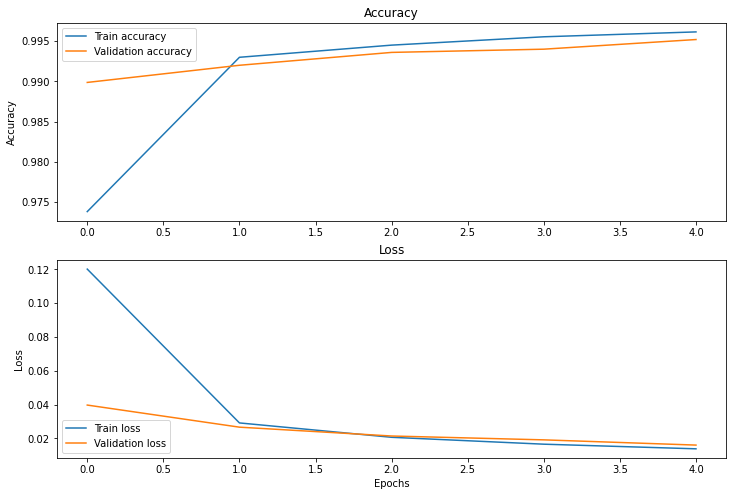

In [ ]:
#ploting loss and accuracy using plot_history function
plot_history(history1)